In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
%cd '/content/drive/MyDrive/object detection'

/content/drive/MyDrive/object detection


In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git'

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 4.98 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.
Checking out files: 100% (2044/2044), done.


In [ ]:
!ls '/content/drive/MyDrive/object detection/darknet'

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


In [ ]:
%cd '/content/drive/MyDrive/object detection/darknet'
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/drive/MyDrive/object detection/darknet


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
%cd '/content/drive/MyDrive/object detection/custom_data'

/content/drive/MyDrive/object detection/custom_data


In [ ]:
%cd '/content/drive/MyDrive/object detection'

/content/drive/MyDrive/object detection


In [ ]:
!python custom_data/creating-files-data-and-name.py

In [ ]:
!python custom_data/creating-train-and-test-txt-files.py

In [ ]:
!darknet/darknet

usage: darknet/darknet <function>


In [ ]:
%cd '/content/drive/MyDrive/object detection'

/content/drive/MyDrive/object detection


In [ ]:
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.630176), count: 2, class_loss = 1.484271, iou_loss = 1.771391, total_loss = 3.255662 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
 total_bbox = 59162, rewritten_bbox = 0.006761 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000152, iou_loss = 0.000000, total_loss = 0.000152 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.801044), count: 5, class_loss = 2.938342, iou_loss = 0.544769, total_loss = 3.483111 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000865, iou_loss = 0.000000, total_loss = 0.000865 
 total_bbox = 59167, rewritten_bbox = 0.006761 % 
v3 (mse

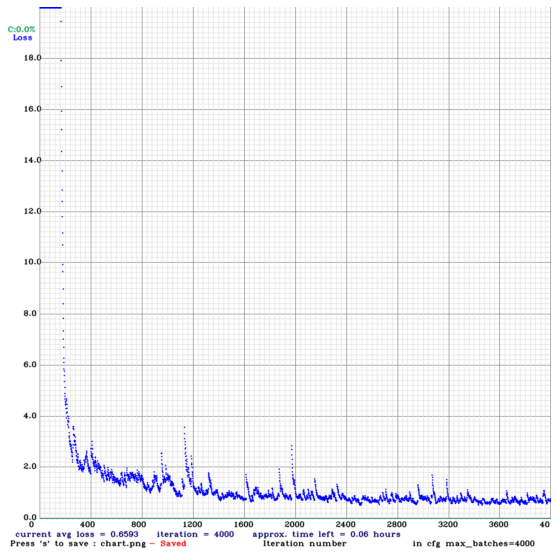

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [ ]:
img_path = "/content/1.jpg"
!./darknet detector test data/data.data cfg/test-yolov4-custom.cfg backup/yolov4-custom_1000.weights {img_path} -dont-show

In [ ]:
img_path = "/content/1.jpg"
!darknet/darknet detector test custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 {img_path} -dont_show

In [ ]:
img_path = "/content/1.jpg"
!darknet/darknet detector test data/data.data /content/yolov3_custom.cfg backup/yolov3_custom_4000.weights {img_path} -dont-show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: data/data.data


In [ ]:
!ls 

backup	  chart.png		   custom_data	  darknet
bad.list  chart_yolov3_custom.png  custom_weight


In [ ]:
img_path = "/content/2.jpg"
!darknet/darknet detector test custom_data/labelled_data.data /content/yolov3_custom.cfg backup/yolov3_custom_4000.weights {img_path} -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

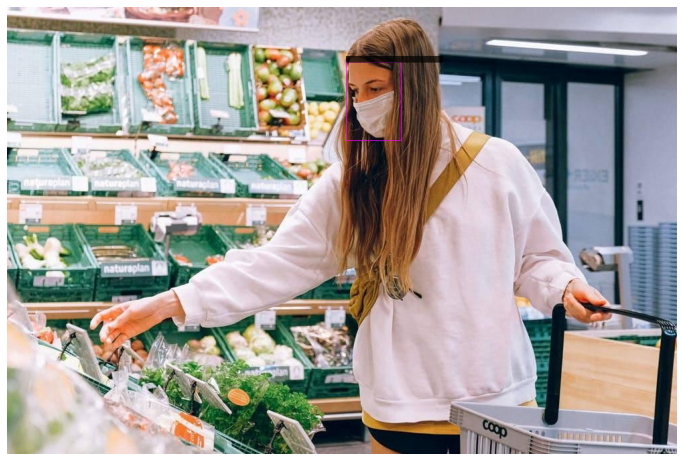

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)